# Setup

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('dark_background')
import sys
sys.path.insert(1, '/home/mauricio/code/mcr')
from mcr.util import glimpse, plot_value_counts, plot_value_counts_timeseries, missing_report, plot_missing, plot_unique, plot_duplicates, size

from pyspark import SparkContext
sc = SparkContext.getOrCreate()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

from pyspark.sql import functions as F
from pyspark.sql.types import *

23/05/02 19:26:42 WARN Utils: Your hostname, rig resolves to a loopback address: 127.0.1.1; using 192.168.0.102 instead (on interface enp6s0)
23/05/02 19:26:42 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/02 19:26:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# Define a new schema using the StructType method
schema = StructType(
    [
        StructField("No.", LongType(), True),
        StructField("MLSID", StringType(), True),
        StructField("StreetNumberNumeric", LongType(), True),
        StructField("streetaddress", StringType(), True),
        StructField("STREETNAME", StringType(), True),
        StructField("PostalCode", LongType(), True),
        StructField("StateOrProvince", StringType(), True),
        StructField("City", StringType(), True),
        StructField("SalesClosePrice", LongType(), True),
        StructField("LISTDATE", DateType(), True),
        StructField("LISTPRICE", LongType(), True),
        StructField("LISTTYPE", StringType(), True),
        StructField("OriginalListPrice", LongType(), True),
        StructField("PricePerTSFT", DoubleType(), True),
        StructField("FOUNDATIONSIZE", LongType(), True),
        StructField("FENCE", StringType(), True),
        StructField("MapLetter", StringType(), True),
        StructField("LotSizeDimensions", StringType(), True),
        StructField("SchoolDistrictNumber", StringType(), True),
        StructField("DAYSONMARKET", LongType(), True),
        StructField("offmarketdate", DateType(), True),
        StructField("Fireplaces", LongType(), True),
        StructField("RoomArea4", StringType(), True),
        StructField("roomtype", StringType(), True),
        StructField("ROOF", StringType(), True),
        StructField("RoomFloor4", StringType(), True),
        StructField("PotentialShortSale", StringType(), True),
        StructField("PoolDescription", StringType(), True),
        StructField("PDOM", LongType(), True),
        StructField("GarageDescription", StringType(), True),
        StructField("SQFTABOVEGROUND", LongType(), True),
        StructField("Taxes", LongType(), True),
        StructField("RoomFloor1", StringType(), True),
        StructField("RoomArea1", StringType(), True),
        StructField("TAXWITHASSESSMENTS", DoubleType(), True),
        StructField("TAXYEAR", LongType(), True),
        StructField("LivingArea", LongType(), True),
        StructField("UNITNUMBER", StringType(), True),
        StructField("YEARBUILT", LongType(), True),
        StructField("ZONING", StringType(), True),
        StructField("STYLE", StringType(), True),
        StructField("ACRES", DoubleType(), True),
        StructField("CoolingDescription", StringType(), True),
        StructField("APPLIANCES", StringType(), True),
        StructField("backonmarketdate", DateType(), True),
        StructField("ROOMFAMILYCHAR", StringType(), True),
        StructField("RoomArea3", StringType(), True),
        StructField("EXTERIOR", StringType(), True),
        StructField("RoomFloor3", StringType(), True),
        StructField("RoomFloor2", StringType(), True),
        StructField("RoomArea2", StringType(), True),
        StructField("DiningRoomDescription", StringType(), True),
        StructField("BASEMENT", StringType(), True),
        StructField("BathsFull", LongType(), True),
        StructField("BathsHalf", LongType(), True),
        StructField("BATHQUARTER", LongType(), True),
        StructField("BATHSTHREEQUARTER", LongType(), True), # Pandas turns to float64 due to missing values
        StructField("Class", StringType(), True),
        StructField("BATHSTOTAL", LongType(), True),
        StructField("BATHDESC", StringType(), True),
        StructField("RoomArea5", StringType(), True),
        StructField("RoomFloor5", StringType(), True),
        StructField("RoomArea6", StringType(), True),
        StructField("RoomFloor6", StringType(), True),
        StructField("RoomArea7", StringType(), True),
        StructField("RoomFloor7", StringType(), True),
        StructField("RoomArea8", StringType(), True),
        StructField("RoomFloor8", StringType(), True),
        StructField("Bedrooms", LongType(), True),
        StructField("SQFTBELOWGROUND", LongType(), True),
        StructField("AssumableMortgage", StringType(), True),
        StructField("AssociationFee", LongType(), True),
        StructField("ASSESSMENTPENDING", StringType(), True),
        StructField("AssessedValuation", DoubleType(), True),
    ]
)

In [3]:
# Load the CSV file
# inferSchema doesn't parse dates:
# df = spark.read.format('csv').options(Header=True).options(inferSchema=True).options(dateFormat='M/d/y H:m').load('2017_StPaul_MN_Real_Estate.csv', dateFormat='M/d/y H:m')
# schema does parse dates:
df = spark.read.format('csv').options(Header=True).options(dateFormat='M/d/y H:m').load('2017_StPaul_MN_Real_Estate.csv', schema=schema)
# In case we want to cast StringType to TimestampType or DateType after read
# df = df.withColumn('LISTDATE', F.to_timestamp('LISTDATE', format='M/d/y H:m'))
# df = df.withColumn('LISTDATE', F.to_date('LISTDATE', format='M/d/y H:m'))
# df = df.withColumn('offmarketdate', F.to_timestamp('offmarketdate', format='M/d/y H:m'))
# df = df.withColumn('offmarketdate', F.to_date('offmarketdate', format='M/d/y H:m'))
df.printSchema()

root
 |-- No.: long (nullable = true)
 |-- MLSID: string (nullable = true)
 |-- StreetNumberNumeric: long (nullable = true)
 |-- streetaddress: string (nullable = true)
 |-- STREETNAME: string (nullable = true)
 |-- PostalCode: long (nullable = true)
 |-- StateOrProvince: string (nullable = true)
 |-- City: string (nullable = true)
 |-- SalesClosePrice: long (nullable = true)
 |-- LISTDATE: date (nullable = true)
 |-- LISTPRICE: long (nullable = true)
 |-- LISTTYPE: string (nullable = true)
 |-- OriginalListPrice: long (nullable = true)
 |-- PricePerTSFT: double (nullable = true)
 |-- FOUNDATIONSIZE: long (nullable = true)
 |-- FENCE: string (nullable = true)
 |-- MapLetter: string (nullable = true)
 |-- LotSizeDimensions: string (nullable = true)
 |-- SchoolDistrictNumber: string (nullable = true)
 |-- DAYSONMARKET: long (nullable = true)
 |-- offmarketdate: date (nullable = true)
 |-- Fireplaces: long (nullable = true)
 |-- RoomArea4: string (nullable = true)
 |-- roomtype: string (n

In [4]:
with pd.option_context('display.max_rows', 100, 'display.max_colwidth',1000):
    display(glimpse(df.toPandas()))

23/05/02 19:26:45 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 74 entries, No. to AssessedValuation
dtypes: float64(5), int64(22), object(47)
memory usage: 15.3 MB


,field,non-null count,missing ratio,data type,unique count,unique preview
0,ACRES,5000,0.0,float64,570,"[0.0, 0.002, 0.005, 0.007, 0.01, ..., 5.41, 6.0, 6.035, 9.27, 9.47]"
1,APPLIANCES,4669,0.0662,object,743,"[Cooktop, Dishwasher, Refrigerator, Cooktop, Dishwasher, Refrigerator, Washer, Dryer, Cooktop, Dishwasher, Refrigerator, Washer, Dryer, Disposal, Cooktop, Exhaust Fan/Hood, Dishwasher, Refrigerator, Washer, Dryer, Water Softener - Owned, Cooktop, Exhaust Fan/Hood, Refrigerator, Washer, Dryer, ..., Wall Oven, Microwave, Exhaust Fan/Hood, Dishwasher, Refrigerator, Washer, Dryer, Disposal, Wall Oven, Microwave, Exhaust Fan/Hood, Dishwasher, Refrigerator, Washer, Dryer, Water Softener - Owned, Disposal, Washer, Dryer, Water Softener - Owned, Water Softener - Owned, Disposal, Air-To-Air Exchanger, Furnace Humidifier]"
2,ASSESSMENTPENDING,5000,0.0,object,3,"[No, Unknown, Yes]"
3,AssessedValuation,5000,0.0,float64,756,"[0.0, 1.0, 100.0, 1000.0, 1001.0, ..., 930.0, 940.0, 952.56, 978.0, 980.58]"
4,AssociationFee,5000,0.0,int64,332,"[0, 10, 100, 1000, 101, ..., 957, 96, 98, 983, 99]"
5,AssumableMortgage,1896,0.6208,object,4,"[Information Coming, Not Assumable, Yes w/ Qualifying, Yes w/No Qualifying]"
6,BASEMENT,5000,0.0,object,670,"[Concrete Block, Concrete Block, Poured Concrete, Concrete Block, Slab, Unfinished, Concrete Block, Unfinished, Crawl Space, ..., Walkout, Sump Pump, Walkout, Sump Pump, Concrete Block, Walkout, Sump Pump, Day/Lookout Windows, Walkout, Sump Pump, Poured Concrete, Unfinished, Walkout, Unfinished]"
7,BATHDESC,4634,0.0732,object,887,"[1/2 Basement, 1/2 Basement, Basement, 1/2 Basement, Rough In, Basement, 3/4 Basement, 3/4 Basement, Basement, ..., Upper Level Full Bath , Walk-In Shower, Upper Level Full Bath , Walk-In Shower, 3/4 Basement, Upper Level Full Bath , Walk-In Shower, Basement, Upper Level Full Bath , Whirlpool, Whirlpool]"
8,BATHQUARTER,5000,0.0,int64,3,"[0, 1, 2]"
9,BATHSTHREEQUARTER,4999,0.0002,float64,5,"[0.0, 1.0, 2.0, 3.0, 4.0]"


In [5]:
# Stanrdaize column names
from re import sub
df = df.selectExpr([f"`{c}` as " + sub(r'\.', '', c).upper() for c in df.columns])

In [6]:
# Save imported CSV->Dataframe to Parquet and read it back
df.write.parquet('Real_Estate.parq', mode='overwrite')
df = spark.read.parquet('Real_Estate.parq')
df.printSchema()

root
 |-- NO: long (nullable = true)
 |-- MLSID: string (nullable = true)
 |-- STREETNUMBERNUMERIC: long (nullable = true)
 |-- STREETADDRESS: string (nullable = true)
 |-- STREETNAME: string (nullable = true)
 |-- POSTALCODE: long (nullable = true)
 |-- STATEORPROVINCE: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- SALESCLOSEPRICE: long (nullable = true)
 |-- LISTDATE: date (nullable = true)
 |-- LISTPRICE: long (nullable = true)
 |-- LISTTYPE: string (nullable = true)
 |-- ORIGINALLISTPRICE: long (nullable = true)
 |-- PRICEPERTSFT: double (nullable = true)
 |-- FOUNDATIONSIZE: long (nullable = true)
 |-- FENCE: string (nullable = true)
 |-- MAPLETTER: string (nullable = true)
 |-- LOTSIZEDIMENSIONS: string (nullable = true)
 |-- SCHOOLDISTRICTNUMBER: string (nullable = true)
 |-- DAYSONMARKET: long (nullable = true)
 |-- OFFMARKETDATE: date (nullable = true)
 |-- FIREPLACES: long (nullable = true)
 |-- ROOMAREA4: string (nullable = true)
 |-- ROOMTYPE: string (nu

In [7]:
with pd.option_context('display.max_rows', 100, 'display.max_colwidth',1000):
    display(glimpse(df.toPandas()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 74 entries, NO to ASSESSEDVALUATION
dtypes: float64(5), int64(22), object(47)
memory usage: 15.3 MB


,field,non-null count,missing ratio,data type,unique count,unique preview
0,ACRES,5000,0.0,float64,570,"[0.0, 0.002, 0.005, 0.007, 0.01, ..., 5.41, 6.0, 6.035, 9.27, 9.47]"
1,APPLIANCES,4669,0.0662,object,743,"[Cooktop, Dishwasher, Refrigerator, Cooktop, Dishwasher, Refrigerator, Washer, Dryer, Cooktop, Dishwasher, Refrigerator, Washer, Dryer, Disposal, Cooktop, Exhaust Fan/Hood, Dishwasher, Refrigerator, Washer, Dryer, Water Softener - Owned, Cooktop, Exhaust Fan/Hood, Refrigerator, Washer, Dryer, ..., Wall Oven, Microwave, Exhaust Fan/Hood, Dishwasher, Refrigerator, Washer, Dryer, Disposal, Wall Oven, Microwave, Exhaust Fan/Hood, Dishwasher, Refrigerator, Washer, Dryer, Water Softener - Owned, Disposal, Washer, Dryer, Water Softener - Owned, Water Softener - Owned, Disposal, Air-To-Air Exchanger, Furnace Humidifier]"
2,ASSESSEDVALUATION,5000,0.0,float64,756,"[0.0, 1.0, 100.0, 1000.0, 1001.0, ..., 930.0, 940.0, 952.56, 978.0, 980.58]"
3,ASSESSMENTPENDING,5000,0.0,object,3,"[No, Unknown, Yes]"
4,ASSOCIATIONFEE,5000,0.0,int64,332,"[0, 10, 100, 1000, 101, ..., 957, 96, 98, 983, 99]"
5,ASSUMABLEMORTGAGE,1896,0.6208,object,4,"[Information Coming, Not Assumable, Yes w/ Qualifying, Yes w/No Qualifying]"
6,BACKONMARKETDATE,0,1.0,object,0,[]
7,BASEMENT,5000,0.0,object,670,"[Concrete Block, Concrete Block, Poured Concrete, Concrete Block, Slab, Unfinished, Concrete Block, Unfinished, Crawl Space, ..., Walkout, Sump Pump, Walkout, Sump Pump, Concrete Block, Walkout, Sump Pump, Day/Lookout Windows, Walkout, Sump Pump, Poured Concrete, Unfinished, Walkout, Unfinished]"
8,BATHDESC,4634,0.0732,object,887,"[1/2 Basement, 1/2 Basement, Basement, 1/2 Basement, Rough In, Basement, 3/4 Basement, 3/4 Basement, Basement, ..., Upper Level Full Bath , Walk-In Shower, Upper Level Full Bath , Walk-In Shower, 3/4 Basement, Upper Level Full Bath , Walk-In Shower, Basement, Upper Level Full Bath , Whirlpool, Whirlpool]"
9,BATHQUARTER,5000,0.0,int64,3,"[0, 1, 2]"


# Dropping data

## Where can data go bad?
* Recorded wrong
* Unique events
* Formatted incorrectly
* Duplications
* Missing
* Not relevant

## Dropping columns

In [8]:
# List of columns to drop
cols_to_drop = ['NO', 'UNITNUMBER', 'CLASS']
# Drop the columns
df = df.drop(*cols_to_drop)

## Text filtering

In [9]:
df.groupby('POTENTIALSHORTSALE').count().show()

+------------------+-----+
|POTENTIALSHORTSALE|count|
+------------------+-----+
|                No| 4989|
|     Not Disclosed|   11|
+------------------+-----+



In [10]:
print(df.count())
df = df.where(~df['POTENTIALSHORTSALE'].like('Not Disclosed'))
print(df.count())

5000
4989


## Outlier filtering

mean_val=262,861 std_val=140,647


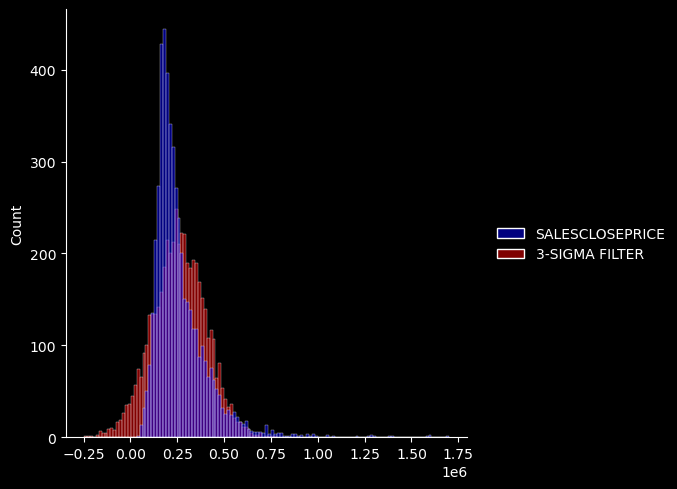

In [11]:
# Calculate values used for filtering
std_val = df.agg({'SALESCLOSEPRICE': 'stddev'}).collect()[0][0]
mean_val = df.agg({'SALESCLOSEPRICE': 'mean'}).collect()[0][0]
print(f'{mean_val=:,.0f} {std_val=:,.0f}')
# Create three standard deviation (? ± 3?) upper and lower bounds for data
hi_bound = mean_val + (3 * std_val)
low_bound = mean_val - (3 * std_val)
# visualize the filter over data
sns.displot(pd.concat([df.select('SALESCLOSEPRICE').toPandas(),
                       pd.DataFrame(np.random.normal(loc=mean_val, scale=std_val, size=df.count()),
                                    columns=['3-SIGMA FILTER'])], axis=1), palette=['blue', 'red'])
plt.show()

In [12]:
# Use where() to filter the DataFrame between values
print(df.count())
df = df.where((df['LISTPRICE'] < hi_bound) & (df['LISTPRICE'] > low_bound))
print(df.count())

4989
4905


## Dropping NA's or NULLs

In [13]:
# Drop any records with NULL values
# df = df.dropna() # would drop all for this data

In [14]:
# drop records if both LISTPRICE and SALESCLOSEPRICE are NULL
print(df.count())
df = df.dropna(how='all', subset=['LISTPRICE', 'SALESCLOSEPRICE'])
print(df.count())

4905
4905


In [15]:
# Drop records where at least two columns have NULL values
print(df.count())
df = df.dropna(thresh=2)
print(df.count())

4905
4905


## Dropping Duplicates
What is a duplicate?
* Two or more records contains all the same information
* After dropping columns or joining datasets, check for duplicates  
        `dropDuplicates()`

* Can be run across entire DataFrame or a list of columns
* In PySpark there is no order for which record is removed

In [16]:
# Entire DataFrame
print(df.count())
df.dropDuplicates()
print(df.count())

4905
4905


In [17]:
# Check only a column list
df.dropDuplicates(['streetaddress'])

DataFrame[MLSID: string, STREETNUMBERNUMERIC: bigint, STREETADDRESS: string, STREETNAME: string, POSTALCODE: bigint, STATEORPROVINCE: string, CITY: string, SALESCLOSEPRICE: bigint, LISTDATE: date, LISTPRICE: bigint, LISTTYPE: string, ORIGINALLISTPRICE: bigint, PRICEPERTSFT: double, FOUNDATIONSIZE: bigint, FENCE: string, MAPLETTER: string, LOTSIZEDIMENSIONS: string, SCHOOLDISTRICTNUMBER: string, DAYSONMARKET: bigint, OFFMARKETDATE: date, FIREPLACES: bigint, ROOMAREA4: string, ROOMTYPE: string, ROOF: string, ROOMFLOOR4: string, POTENTIALSHORTSALE: string, POOLDESCRIPTION: string, PDOM: bigint, GARAGEDESCRIPTION: string, SQFTABOVEGROUND: bigint, TAXES: bigint, ROOMFLOOR1: string, ROOMAREA1: string, TAXWITHASSESSMENTS: double, TAXYEAR: bigint, LIVINGAREA: bigint, YEARBUILT: bigint, ZONING: string, STYLE: string, ACRES: double, COOLINGDESCRIPTION: string, APPLIANCES: string, BACKONMARKETDATE: date, ROOMFAMILYCHAR: string, ROOMAREA3: string, EXTERIOR: string, ROOMFLOOR3: string, ROOMFLOOR2: 

## Exercises

### Dropping a list of columns

In [18]:
# List of columns to remove from dataset
cols_to_drop = ['STREETNUMBERNUMERIC', 'LOTSIZEDIMENSIONS']

# Drop columns in list
df = df.drop(*cols_to_drop)

> Knowing just the house number doesn't tell us anything about what value the house should be. Likewise the freeform text field is likely too messy to extract useful information from. We can always come back to these after our intial model if we need more information.

### Using text filters to remove records
You find out that Assumable mortgage is an unusual occurrence in the real estate industry and your client suggests you exclude them.

In [19]:
# Inspect unique values in the column 'ASSUMABLEMORTGAGE'
df.select(['ASSUMABLEMORTGAGE']).distinct().show()
# List of possible values containing 'yes'
yes_values = ['Yes w/ Qualifying', 'Yes w/No Qualifying']
# Filter the text values out of df but keep null values
text_filter = ~df['ASSUMABLEMORTGAGE'].isin(yes_values) | df['ASSUMABLEMORTGAGE'].isNull()
df = df.where(text_filter)
# Print count of remaining records
df.count()

+-------------------+
|  ASSUMABLEMORTGAGE|
+-------------------+
|  Yes w/ Qualifying|
| Information Coming|
|               null|
|Yes w/No Qualifying|
|      Not Assumable|
+-------------------+



4881

> We've filtered out records that we don't wish to predict for since they are so unusual.

### Filtering numeric fields conditional
We want to understand what a normal range of houses sell for. Let's make sure we exclude any outlier homes that have sold for significantly more or less than the average. Here we will calculate the mean and standard deviation and use them to filer the near normal field `log_SalesClosePrice`.

In [20]:
df = df.withColumn('LOG_SALESCLOSEPRICE', F.log('SALESCLOSEPRICE'))

In [21]:
from pyspark.sql.functions import mean, stddev

# Calculate values used for outlier filtering
mean_val = df.agg({'LOG_SALESCLOSEPRICE': 'mean'}).collect()[0][0]
stddev_val = df.agg({'LOG_SALESCLOSEPRICE': 'stddev'}).collect()[0][0]

# Create three standard deviation (μ ± 3σ) lower and upper bounds for data
low_bound = mean_val - (3 * stddev_val)
hi_bound = mean_val + (3 * stddev_val)

# Filter the data to fit between the lower and upper bounds
df = df.where((df['LOG_SALESCLOSEPRICE'] < hi_bound) & (df['LOG_SALESCLOSEPRICE'] > low_bound))

> If we were to get new data, or the value for Jumbo Loans changes, we can dynamically refilter it!

# Adjusting data

## Minmax Scaling

In [22]:
# define min and max values and collect them
max_days = df.agg({'DAYSONMARKET': 'max'}).collect()[0][0]
min_days = df.agg({'DAYSONMARKET': 'min'}).collect()[0][0]
# create a new column based off the scaled data
df = df.withColumn("scaled_days",
                   (df['DAYSONMARKET'] - min_days) / (max_days - min_days))
df[['scaled_days']].show(5)

+--------------------+
|         scaled_days|
+--------------------+
|0.044444444444444446|
|0.017777777777777778|
| 0.12444444444444444|
| 0.08444444444444445|
| 0.09333333333333334|
+--------------------+
only showing top 5 rows



## Standardization

In [23]:
mean_days = df.agg({'DAYSONMARKET': 'mean'}).collect()[0][0]
stddev_days = df.agg({'DAYSONMARKET': 'stddev'}).collect()[0][0]
# Create a new column with the scaled data
df = df.withColumn("ztrans_days",
                   (df['DAYSONMARKET'] - mean_days) / stddev_days)
df.agg({'ztrans_days': 'mean'}).collect()

[Row(avg(ztrans_days)=6.71106664977853e-17)]

In [24]:
df.agg({'ztrans_days': 'stddev'}).collect()

[Row(stddev(ztrans_days)=0.9999999999999994)]

## Log Scaling

Our data for SALESCLOSEPRICE is pushed to the left. This is called positive skew. **One potential way to treat skewed data is to apply a log transformation on the data**. This has the impact of making our data look more like a normal distribution.

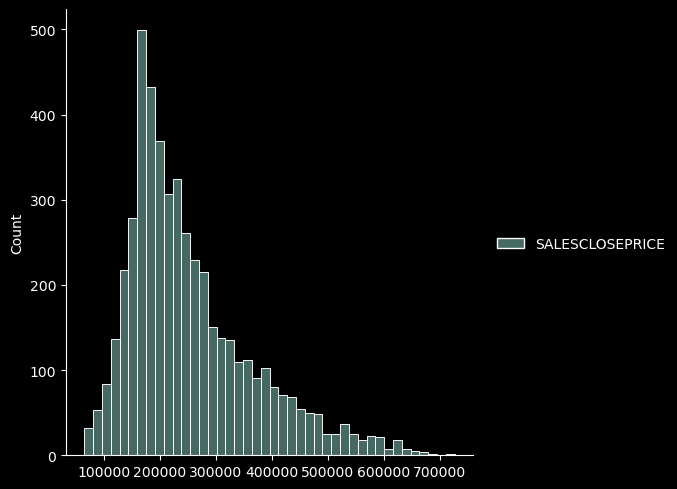

In [25]:
sns.displot(df.select('SALESCLOSEPRICE').toPandas())
plt.show()

In [26]:
# import the log function
from pyspark.sql.functions import log
# Recalculate log of SALESCLOSEPRICE
df = df.withColumn('LOG_SALESCLOSEPRICE', log(df['SALESCLOSEPRICE']))

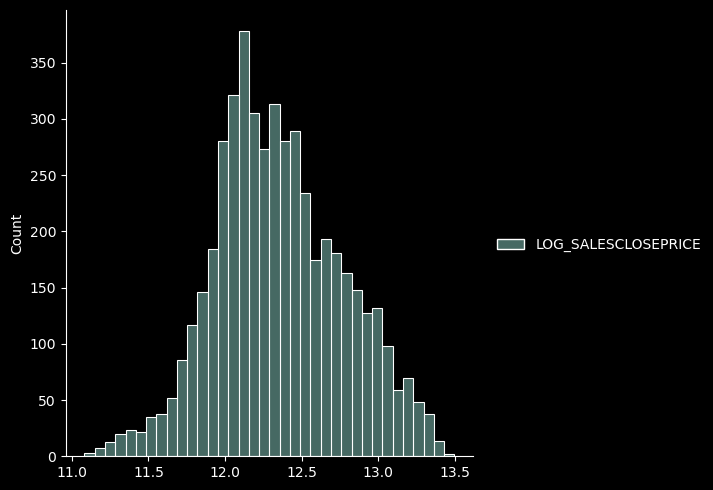

In [27]:
sns.displot(df.select('LOG_SALESCLOSEPRICE').toPandas())
plt.show()

## Exercises

### Custom Percentage Scaling (MinMax scaling)

In [28]:
# Define max and min values and collect them
max_days = df.agg({'DAYSONMARKET': 'max'}).collect()[0][0]
min_days = df.agg({'DAYSONMARKET': 'min'}).collect()[0][0]

# Create a new column based off the scaled data
df = df.withColumn('percentagescaleddays',
                   F.round((df['DAYSONMARKET'] - min_days) / (max_days - min_days)) * 100)

# Calc max and min for new column
print(df.agg({'percentagescaleddays': 'max'}).collect())
print(df.agg({'percentagescaleddays': 'min'}).collect())

[Row(max(percentagescaleddays)=100.0)]
[Row(min(percentagescaleddays)=0.0)]


### Scaling your scalers

In [29]:
df.select('FOUNDATIONSIZE', 'DAYSONMARKET', 'FIREPLACES').show()

+--------------+------------+----------+
|FOUNDATIONSIZE|DAYSONMARKET|FIREPLACES|
+--------------+------------+----------+
|           980|          10|         0|
|          1144|           4|         0|
|          1102|          28|         0|
|           959|          19|         1|
|          1026|          21|         1|
|          1152|          17|         1|
|           700|          32|         0|
|          1088|           5|         0|
|          1088|          23|         0|
|          1088|          73|         0|
|          1088|          80|         0|
|          1088|          79|         0|
|          1088|          12|         0|
|          1088|           1|         0|
|          1844|          18|         1|
|          1088|           2|         0|
|          1088|          12|         0|
|          1088|          45|         0|
|          1088|          31|         0|
|          1088|          16|         0|
+--------------+------------+----------+
only showing top

In [30]:
cols_to_scale = ['FOUNDATIONSIZE', 'DAYSONMARKET', 'FIREPLACES']
def min_max_scaler(df, cols_to_scale):
    # Takes a dataframe and list of columns to minmax scale. Returns a dataframe.
    for col in cols_to_scale:
        # Define min and max values and collect them
        max_days = df.agg({col: 'max'}).collect()[0][0]
        min_days = df.agg({col: 'min'}).collect()[0][0]
        new_column_name = 'SCALED_' + col
        # Create a new column based off the scaled data
        df = df.withColumn(new_column_name,
                           (df[col] - min_days) / (max_days - min_days))
    return df

df = min_max_scaler(df, cols_to_scale)
# Show that our data is now between 0 and 1
df[['DAYSONMARKET', 'SCALED_DAYSONMARKET']].show()

+------------+--------------------+
|DAYSONMARKET| SCALED_DAYSONMARKET|
+------------+--------------------+
|          10|0.044444444444444446|
|           4|0.017777777777777778|
|          28| 0.12444444444444444|
|          19| 0.08444444444444445|
|          21| 0.09333333333333334|
|          17| 0.07555555555555556|
|          32| 0.14222222222222222|
|           5|0.022222222222222223|
|          23| 0.10222222222222223|
|          73|  0.3244444444444444|
|          80| 0.35555555555555557|
|          79|  0.3511111111111111|
|          12| 0.05333333333333334|
|           1|0.004444444444444...|
|          18|                0.08|
|           2|0.008888888888888889|
|          12| 0.05333333333333334|
|          45|                 0.2|
|          31| 0.13777777777777778|
|          16| 0.07111111111111111|
+------------+--------------------+
only showing top 20 rows



### Correcting Right **NEGATIVE** Skew Data
In the slides we showed how you might use log transforms to fix positively skewed data (data whose distribution is mostly to the left). To correct negative skew (data mostly to the right) you need to take an extra step called "reflecting" before you can apply the inverse of $log$, written as (1/$log$) to make the data look more like normal a normal distribution. Reflecting data uses the following formula to reflect each value: $(x_{max} + 1) -x$

In [31]:
from pyspark.sql.functions import log

# Compute the skewness
print(df.agg({'YEARBUILT': 'skewness'}).collect())

# Calculate the max year
max_year = df.agg({'YEARBUILT': 'max'}).collect()[0][0]

# Create a new column of reflected data
df = df.withColumn('REFLECT_YEARBUILT', (max_year + 1) - df['YEARBUILT'])

# Create a new column based reflected data
df = df.withColumn('ADJ_YEARBUILT', 1 / log(df['REFLECT_YEARBUILT']))

[Row(skewness(YEARBUILT)=-0.2516687824649559)]


> Adjusting variables is a complex task. What you've seen here are only a few of the ways that you might try to make your data fit a normal distribution.

# Working with missing data

## How does data go missing in the digital age?
* Data Collection
    * Broken Sensors
* Data Storage Rules
    * 2017-01-01 vs January 1st, 2017
* Joining Disparate Data
    * Monthly to Weekly
* Intentionally Missing
    * Privacy Concerns

## Types of Missing  

**Missing completely at random**

* Missing Data is just a completely random subset
> Missing Completely at Random occurs when the data is missing with no pattern. Your data is likely still representative of the whole population.
    
**Missing at random**

* Missing conditionally at random based on another observation
> Missing at Random occurs when the probability of missing data on the Y variable is unrelated to the value of Y. For example, suppose males are less likely to answer a depression survey; this has no relationship with their level of depression, after accounting for maleness.

**Missing not at random**

* Data is missing because of how it is collected
> Missing not at random is when the value that is missing is related to the reason why it is missing. Supposing that people with severe health problems do not answer a question asking them to rank their health would indicate missing not at random.

## Assessing Missing Values
When to drop rows with missing data?
* issng values are rare
* Missing Completely at Random  
`isNull()`
* True if the current expression is null.

In [32]:
df.where(df['ROOF'].isNull()).count()

748

## Plotting Missing Values

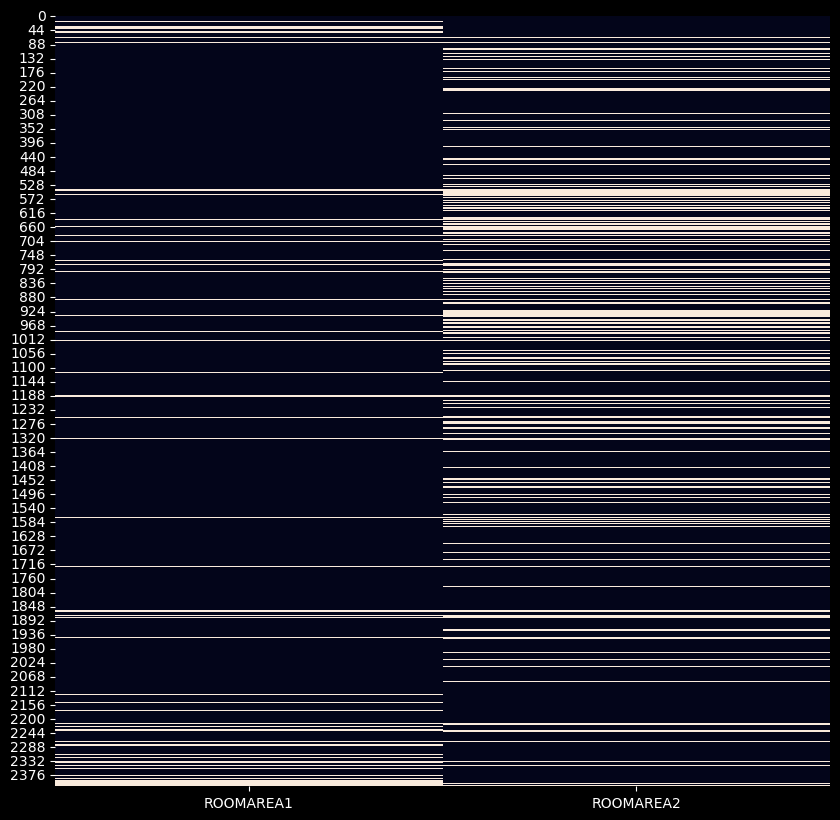

In [33]:
# subset the dataframe
sub_df = df.select(['ROOMAREA1', 'ROOMAREA2'])
# sample the dataframe
sample_df = sub_df.sample(False, .5, 4)
# Convert to Pandas DataFrame
pandas_df = sample_df.toPandas()
# Plot it
plt.figure(figsize=(10,10))
sns.heatmap(data=pandas_df.isnull(), cbar=False)
plt.show()

## Imputation of Missing Values

Process of replacing missing values

Rule Based  
* Value based on business logic  
> The replacement value might be based on business rules such as missing sales means there were no sales and replace with 0.

Statistics Based
* Using mean, median, etc
> If the data is missing completely at random, it may make sense to impute them using the mean or the median.

Model Based
* Use model to predict value
> Another option could be to use interpolation, creating another model to predict the values.

> **Replacing values shouldn't be done without some serious considerations; make sure you research the appropriateness.**

## Imputation of Missing Values

** fillna(value, subset=None)

* value the value to replace missings with
* subset the list of column names to replace missings

        # Replacing missing values with zero
        df = df.fillna(0, subset=['DAYSONMARKET'])

        # Replacing with the mean value for that column
        col_mean = df.agg({'DAYSONMARKET': 'mean'}).collect()[0][0]
        df = df.fillna(col_mean, subset=['DAYSONMARKET'])

## Exercises

### Visualizing Missing Data

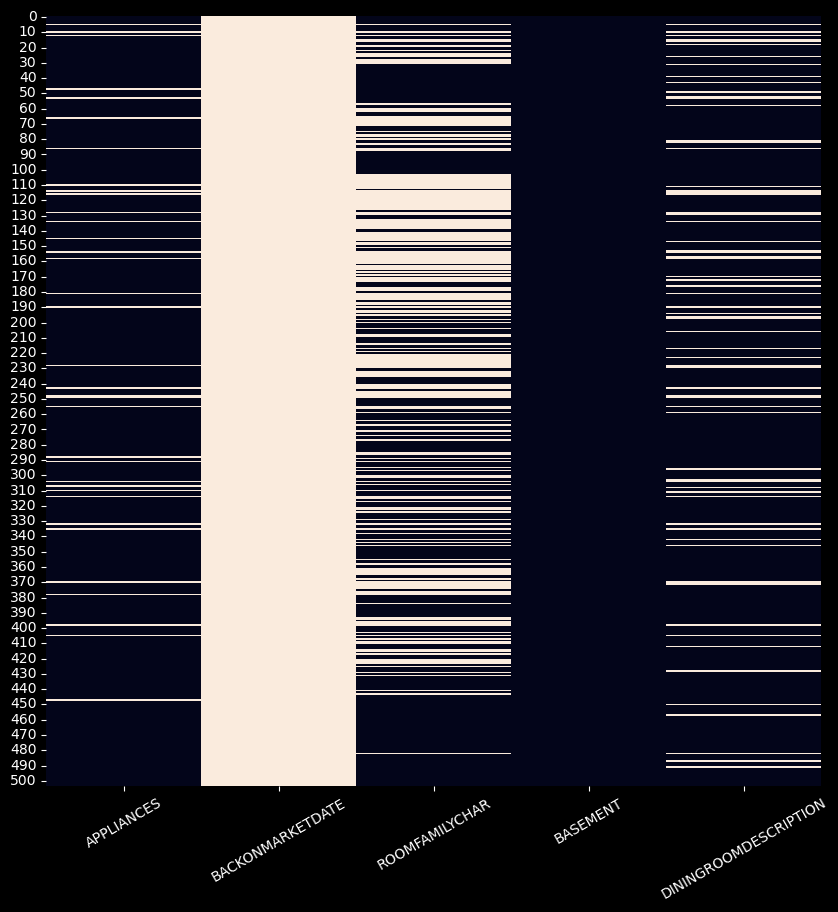

In [34]:
columns = ['APPLIANCES', 'BACKONMARKETDATE', 'ROOMFAMILYCHAR', 'BASEMENT', 'DININGROOMDESCRIPTION']
# Sample the dataframe and convert to Pandas
sample_df = df.select(columns).sample(False, 0.1, 42)
sample_df = sample_df.toPandas()

# Convert all values to T/F
tf_df = sample_df.isnull()

# Plot it
plt.figure(figsize=(10,10))
sns.heatmap(data=tf_df, cbar=False)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

### Imputing Missing Data

In [35]:
# Count missing rows
missing = df.where(df['PDOM'].isNull()).count()

# Calculate the mean value
col_mean = df.agg({'PDOM': 'mean'}).collect()[0][0]

# Replacing with the mean value for that column
df = df.fillna(col_mean, subset=['PDOM'])

> **Missing value replacement is easy, however its ramifications can be huge. Make sure to spend time considering the appropriate ways to handle missing data in your problems.**

### Calculate Missing Percents

In [36]:
def column_dropper(df, threshold):
    # Takes a dataframe and threshold for missing values. Returns a dataframe.
    total_records = df.count()
    for col in df.columns:
        # Calculate the percentage of missing values
        missing = df.where(df[col].isNull()).count()
        missing_percent = missing / total_records
        # Drop column if percent of missing is more than threshold
        if missing_percent > threshold:
            df = df.drop(col)
    return df

print(len(df.columns))
# Drop columns that are more than 60% missing
df = column_dropper(df, 0.6)
print(len(df.columns))

78
73


# Getting more data

## Thoughts on External Data Sets
PROS
* Add important predictors
>  Adding external data may add excellent predictors for a model but adding too many features may impact the performance of the model. There is a serious risk of spurious correlations between variables in the world of big data.
* Supplement/replace values
* Cheap or easy to obtain

CONS
* May 'bog' analysis down
* Easy to induce data leakage
> **Adding data comes at the risk of inducing data leakage. If we wish to include local crime information, we will have to ensure that buyers would also have access to that information at the time of purchasing a home. To include data available later is leaking information from the future.**
* Become data set subject matter expert
> Today we have many more datasets easily available to us but this may come at the cost of us needing to become the subject matter experts to know the meaning and credibility of our sources.

# PySpark Join Example

    # Inspect dataframe head
    hdf.show(2)
    
    # Specify join conditon
    cond = [df['OFFMARKETDATE'] == hdf['dt']]
    
    # Join two hdf onto df
    df = df.join(hdf, on=cond, 'left')
    
    # How many sales occurred on bank holidays?
    df.where(~df['nm'].isNull()).count()

## SparkSQL Join
Apply SQL to your dataframe

    # Register the dataframe as a temp table
    df.createOrReplaceTempView("df")
    hdf.createOrReplaceTempView("hdf")
    
    # Write a SQL Statement
    sql_df = spark.sql("""
    SELECT * FROM df
    LEFT JOIN hdf
    ON df.OFFMARKETDATE = hdf.dt
    """)

## Exercise

### A Dangerous Join

        # Cast data types
        walk_df = walk_df.withColumn('longitude', walk_df['longitude'].cast('double'))
        walk_df = walk_df.withColumn('latitude', walk_df['latitude'].cast('double'))

        # Round percision
        df = df.withColumn('longitude', round(df['longitude'], 5))
        df = df.withColumn('latitude', round(df['latitude'], 5))

        # Create join condition
        condition = [(df['longitude'] == walk_df['longitude']), (df['latitude'] == walk_df['latitude'])]

        # Join the dataframes together
        join_df = df.join(walk_df, on=condition, how='left')
        # Count non-null records from new field
        print(join_df.where(~join_df['walkscore'].isNull()).count())

### Spark SQL Join

        # Register dataframes as tables
        df.createOrReplaceTempView('df')
        walk_df.createOrReplaceTempView('walk_df')

        # SQL to join dataframes
        join_sql = 	"""
                    SELECT 
                        *
                    FROM df
                    LEFT JOIN walk_df
                    ON df.longitude = walk_df.longitude
                    AND df.latitude = walk_df.latitude
                    """
        # Perform sql join
        joined_df = spark.sql(join_sql)

### Checking for Bad Joins

        # Join on mismatched keys precision 
        wrong_prec_cond = [df_orig['longitude'] == walk_df['longitude'], df_orig['latitude'] == walk_df['latitude']]
        wrong_prec_df = df_orig.join(walk_df, on=wrong_prec_cond, how='left')

        # Compare bad join to the correct one
        print(wrong_prec_df.where(wrong_prec_df['walkscore'].isNull()).count())
        print(correct_join_df.where(correct_join_df['walkscore'].isNull()).count())

        # Create a join on too few keys
        few_keys_cond = [df['longitude'] == walk_df['longitude']]
        few_keys_df = df.join(walk_df, on=few_keys_cond, how='left')

        # Compare bad join to the correct one
        print("Record Count of the Too Few Keys Join Example: " + str(few_keys_df.count()))
        print("Record Count of the Correct Join Example: " + str(correct_join_df.count()))

In [37]:
len(df.columns)

73